In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score
from sklearn.model_selection import cross_val_score
import warnings

In [ ]:
# Load the dataset
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#Correlation Matrix
corrmatrix=df.corr()
corrmatrix

<ipython-input-8-0d8456327e15>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix=df.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [ ]:
# Check for missing values
df.isnull().sum()
#print('nMissing Values')

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#check duplicates
Duplicate_rows = df[df.duplicated()]

In [ ]:
#result of duplicate row
Duplicate_rows.shape

(0, 12)

In [ ]:
df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

# Assuming your dataset has features and a target variable 'stroke'
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
object_columns = df.select_dtypes(include='object').columns
#Label Encode the Object Variables
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])


In [ ]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],remainder='passthrough')
x=np.array(ct.fit_transform)
print(X)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046       1  67.0             0              1          Yes   
2     31112       1  80.0             0              1          Yes   
3     60182       0  49.0             0              0          Yes   
4      1665       0  79.0             1              0          Yes   
5     56669       1  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180       0  13.0             0              0           No   
5106  44873       0  81.0             0              0          Yes   
5107  19723       0  35.0             0              0          Yes   
5108  37544       1  51.0             0              0          Yes   
5109  44679       0  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  
0           Private          Urban             228.69  36.6  formerl

**EDA**

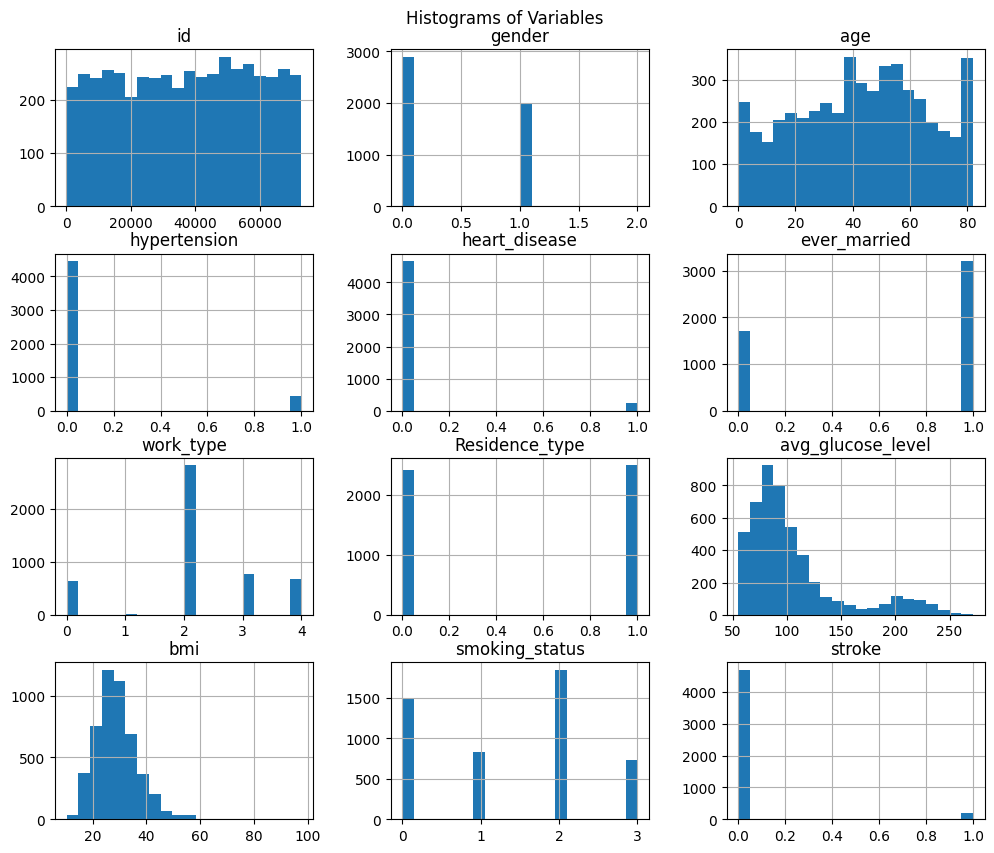

In [ ]:
#Histogram
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Variables', x=0.5, y=0.92)
plt.show()

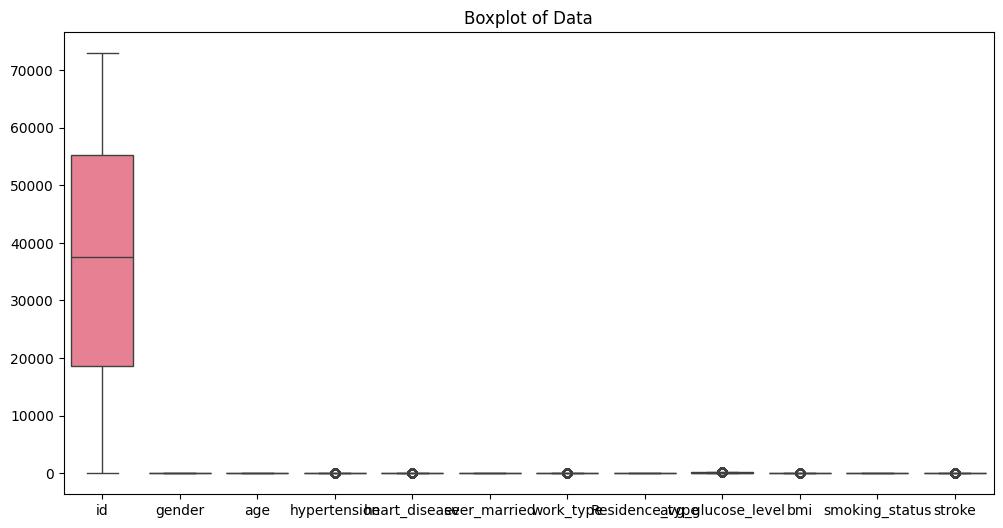

In [ ]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Data')
plt.show()

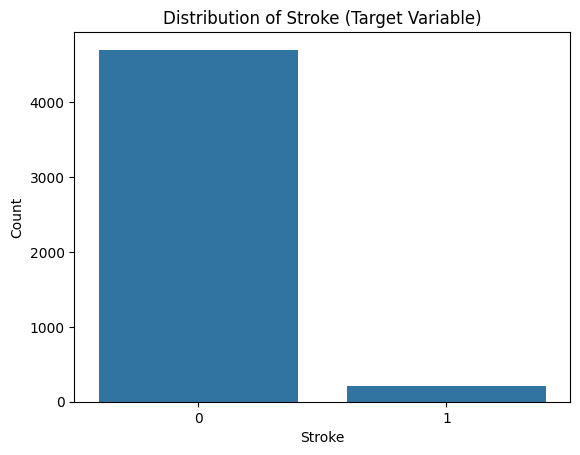

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'stroke' is the column containing the target variable
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke (Target Variable)')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


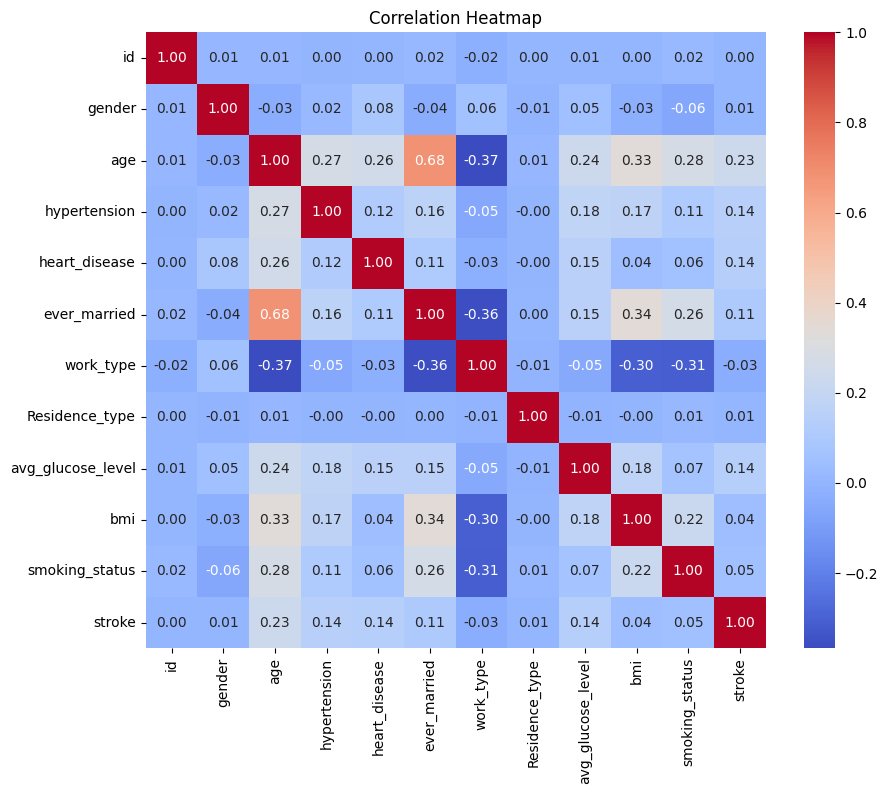

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

DATA SPLITTING

USING SMOOT TO CHECK THE DATA BALANCED OR NOT

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Define X (features) and y (target)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming X_train and y_train are your features and target variable
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({0: 3771, 1: 156})
After SMOTE: Counter({0: 3771, 1: 3771})


MODELS


**Decision** **Tree**

In [ ]:
# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train Decision Tree classifier
dt_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using Decision Tree
dt_y_pred = dt_classifier.predict(X_test)

# Evaluate Decision Tree performance
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_class_report = classification_report(y_test, dt_y_pred)

# Print Decision Tree evaluation results
print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy:.2f}")
print("Confusion Matrix:")
print(dt_conf_matrix)
print("Classification Report:")
print(dt_class_report)

Decision Tree Classifier:
Accuracy: 0.91
Confusion Matrix:
[[880  49]
 [ 42  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       929
           1       0.18      0.21      0.19        53

    accuracy                           0.91       982
   macro avg       0.57      0.58      0.57       982
weighted avg       0.91      0.91      0.91       982



In [ ]:
#CRoss validation score (Decision Tree)
dt_score = cross_val_score(dt_classifier, X, y,cv=5)
dt_score

array([0.95621181, 0.95723014, 0.95621181, 0.95621181, 0.95718654])

**Random** **Forest**

In [ ]:
# Create Randon Forest classifier
dt_classifier = RandomForestClassifier(random_state=42)

# Train Random Forest classifier
dt_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using Random Forest
dt_y_pred = dt_classifier.predict(X_test)

# Evaluate Random Forest performance
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_class_report = classification_report(y_test, dt_y_pred)

# Print Random Forest evaluation results
print("Randon Forest Classifier:")
print(f"Accuracy: {dt_accuracy:.2f}")
print("Confusion Matrix:")
print(dt_conf_matrix)
print("Classification Report:")
print(dt_class_report)

Randon Forest Classifier:
Accuracy: 0.94
Confusion Matrix:
[[925   4]
 [ 52   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.20      0.02      0.03        53

    accuracy                           0.94       982
   macro avg       0.57      0.51      0.50       982
weighted avg       0.91      0.94      0.92       982



In [ ]:
#CRoss validation score (Random Forest )
dt_score = cross_val_score(dt_classifier, X, y,cv=5)
dt_score

array([0.95621181, 0.95723014, 0.95621181, 0.95621181, 0.95718654])

**Support** **Vector Clasifier**

In [ ]:
# Initialize SVC model
svm_classifier = SVC()

# Train (fit) the model with training data
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on test data
svm_y_pred = svm_classifier.predict(X_test)

# Evaluate SVM performance
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
svm_class_report = classification_report(y_test, svm_y_pred)

# Print SVM evaluation results
print("\nSVM Classifier:")
print(f"Accuracy: {svm_accuracy:.2f}")
print("Confusion Matrix:")
print(svm_conf_matrix)
print("Classification Report:")
print(svm_class_report)


SVM Classifier:
Accuracy: 0.78
Confusion Matrix:
[[751 178]
 [ 41  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       929
           1       0.06      0.23      0.10        53

    accuracy                           0.78       982
   macro avg       0.51      0.52      0.49       982
weighted avg       0.90      0.78      0.83       982



In [ ]:
# Cross validation score (SVM)
svm_score = cross_val_score(svm_classifier, X, y,cv=5)
svm_score

array([0.95723014, 0.95723014, 0.95723014, 0.95723014, 0.95820591])

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),

}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print the results
print("Model Performance:")
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.4f}")

# Find the best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy = {results[best_model]:.4f}")

# Optionally, you can print more detailed performance metrics like classification report for each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Find the best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy = {results[best_model]:.4f}")



Model Performance:
Random Forest: Accuracy = 0.9460
SVM: Accuracy = 0.9460
Decision Tree: Accuracy = 0.9206

Best Model: Random Forest with Accuracy = 0.9460

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       929
           1       0.17      0.11      0.13        53

    accuracy                           0.92       982
   macro avg       0.56      0.54      0.55       982
weighted avg       0.91      0.92      0.91       982


Best Model: Random Forest with Accuracy = 0.9460


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
